In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'RELIANCE.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,14.638248,14.716795,14.541850,14.691803,9.302444,52060684
1996-01-02,14.656100,14.727506,14.470444,14.577553,9.230103,84371654
1996-01-03,14.816763,15.491551,14.656100,14.688232,9.300180,104661939
1996-01-04,14.548991,14.595404,14.356194,14.552561,9.214278,108450132
1996-01-05,14.495436,14.495436,14.327632,14.452592,9.150981,83354233
...,...,...,...,...,...,...
2024-06-14,2940.000000,2959.350098,2914.449951,2955.100098,2955.100098,4078999
2024-06-18,2974.699951,2974.800049,2942.699951,2962.050049,2962.050049,3598383
2024-06-19,2975.000000,2975.000000,2912.000000,2917.300049,2917.300049,4362937


In [32]:
new_df = df.tail(224)
d = new_df.head(20)['Close']
d = list(d)
d

[2538.75,
 2487.39990234375,
 2485.800048828125,
 2526.199951171875,
 2502.699951171875,
 2527.85009765625,
 2549.25,
 2513.199951171875,
 2486.35009765625,
 2475.89990234375,
 2509.550048828125,
 2523.85009765625,
 2508.64990234375,
 2525.199951171875,
 2536.449951171875,
 2547.14990234375,
 2577.25,
 2575.14990234375,
 2538.0,
 2556.800048828125]

In [55]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00123491, 0.00119695, 0.00123373, 0.00118865, 0.00115543,
       0.00096326, 0.00083039, 0.00071532, 0.00085175, 0.0008043 ,
       0.00075803, 0.00076633, 0.00059077, 0.00047332, 0.00040096,
       0.00046977, 0.00029538, 0.00016015, 0.        , 0.        ])]
[0.00028707874875090553]

[array([0.00123491, 0.00119695, 0.00123373, 0.00118865, 0.00115543,
       0.00096326, 0.00083039, 0.00071532, 0.00085175, 0.0008043 ,
       0.00075803, 0.00076633, 0.00059077, 0.00047332, 0.00040096,
       0.00046977, 0.00029538, 0.00016015, 0.        , 0.        ]), array([0.00119695, 0.00123373, 0.00118865, 0.00115543, 0.00096326,
       0.00083039, 0.00071532, 0.00085175, 0.0008043 , 0.00075803,
       0.00076633, 0.00059077, 0.00047332, 0.00040096, 0.00046977,
       0.00029538, 0.00016015, 0.        , 0.        , 0.00028708])]
[0.00028707874875090553, 0.0006405888832623522]



In [56]:
y_train = np.reshape(y_train, (y_train.shape[0],  1))
y_train

array([[2.87078749e-04],
       [6.40588883e-04],
       [5.46873127e-04],
       ...,
       [7.86324099e-01],
       [7.80543182e-01],
       [7.68736125e-01]])

In [4]:



from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=11)

[array([0.00123491, 0.00119695, 0.00123373, 0.00118865, 0.00115543,
       0.00096326, 0.00083039, 0.00071532, 0.00085175, 0.0008043 ,
       0.00075803, 0.00076633, 0.00059077, 0.00047332, 0.00040096,
       0.00046977, 0.00029538, 0.00016015, 0.        , 0.        ])]
[0.00028707874875090553]

[array([0.00123491, 0.00119695, 0.00123373, 0.00118865, 0.00115543,
       0.00096326, 0.00083039, 0.00071532, 0.00085175, 0.0008043 ,
       0.00075803, 0.00076633, 0.00059077, 0.00047332, 0.00040096,
       0.00046977, 0.00029538, 0.00016015, 0.        , 0.        ]), array([0.00119695, 0.00123373, 0.00118865, 0.00115543, 0.00096326,
       0.00083039, 0.00071532, 0.00085175, 0.0008043 , 0.00075803,
       0.00076633, 0.00059077, 0.00047332, 0.00040096, 0.00046977,
       0.00029538, 0.00016015, 0.        , 0.        , 0.00028708])]
[0.00028707874875090553, 0.0006405888832623522]




Epoch 1/11

6773/6773 [==============================] - 137s 18ms/step - loss: 4.7730e-04
Epoch 2/11
6773/677

In [51]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 


In [25]:
import joblib


model_file_path = '1.joblib'
scaler_file_path = 'scaler1.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 1.joblib
Scaler saved to scaler1.joblib


In [45]:
import joblib
import numpy as np

# Load the model and scaler
model_file_path = '1.joblib'
scaler_file_path = 'scaler1.joblib'
loaded_model = joblib.load(model_file_path)
loaded_scaler = joblib.load(scaler_file_path)



# Initialize predictions list
predictions = []

# Prepare the initial data
new_data = np.array(d).reshape(-1, 1)
new_data_scaled = loaded_scaler.transform(new_data)
new_data_scaled = new_data_scaled.reshape(1, new_data_scaled.shape[0], 1)

# Predict the first price
predicted_price = loaded_model.predict(new_data_scaled)
prediction = loaded_scaler.inverse_transform(predicted_price.reshape(-1, 1))
predictions.append([prediction[0][0]])

# Iteratively predict the next prices
for i in range(22):
    # Remove the oldest entry and add the new prediction (maintain the 3D shape)
    new_data_scaled = np.delete(new_data_scaled, 0, axis=1)
    new_data_scaled = np.append(new_data_scaled, predicted_price[:, -1:, np.newaxis], axis=1)
    
    # Predict the next price
    predicted_price = loaded_model.predict(new_data_scaled)
    prediction = loaded_scaler.inverse_transform(predicted_price.reshape(-1, 1))
    predictions.append([prediction[0][0]])

# Print the predictions
print(predictions)


1/1 [==============================] - 0s 52ms/step
[[2573.393], [2583.8662], [2591.5474], [2598.2346], [2604.6511], [2610.7725], [2616.48], [2621.721], [2626.5217], [2630.9224], [2634.9521], [2638.6155], [2641.928], [2644.9314], [2647.6494], [2650.104], [2652.3206], [2654.3123], [2656.1057], [2657.748], [2659.251], [2660.619], [2661.8599]]


In [52]:
predictions = loaded_model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

12/12 [==============================] - 0s 20ms/step


0.9794600583214913

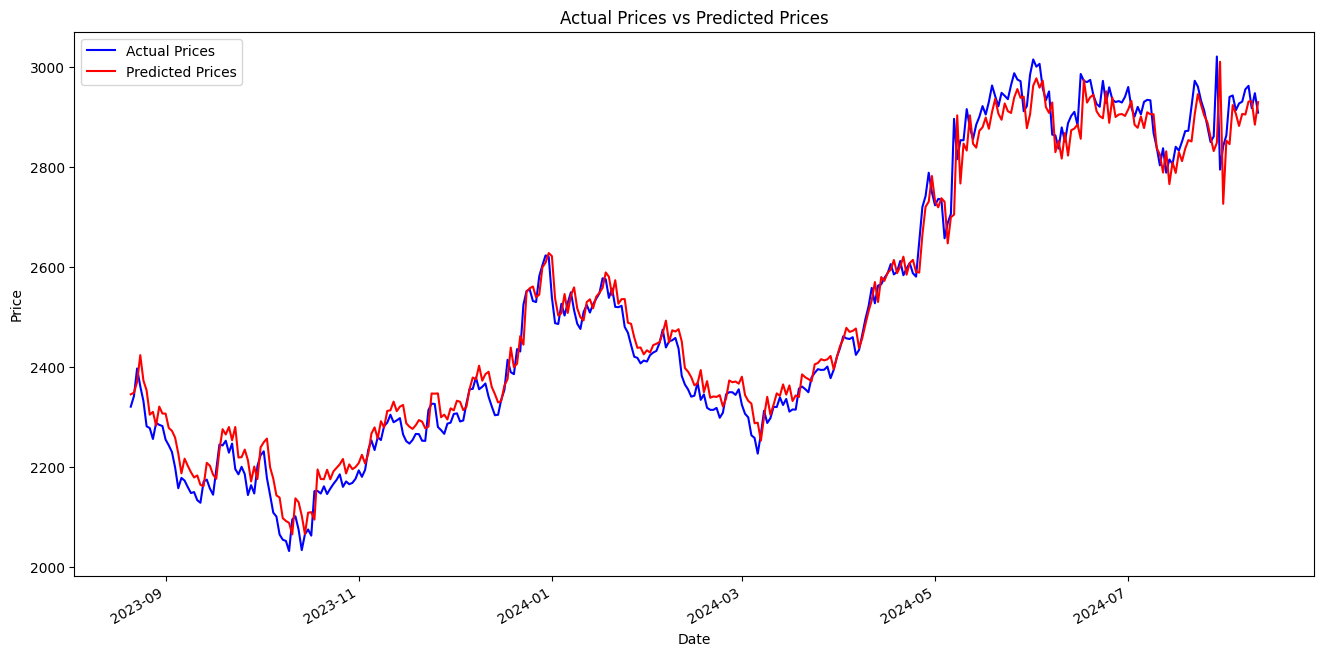

In [53]:
import matplotlib.pyplot as plt
y_test = loaded_scaler.inverse_transform(y_test)
predictions = loaded_scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  
plt.show()

212/212 [==============================] - 2s 11ms/step


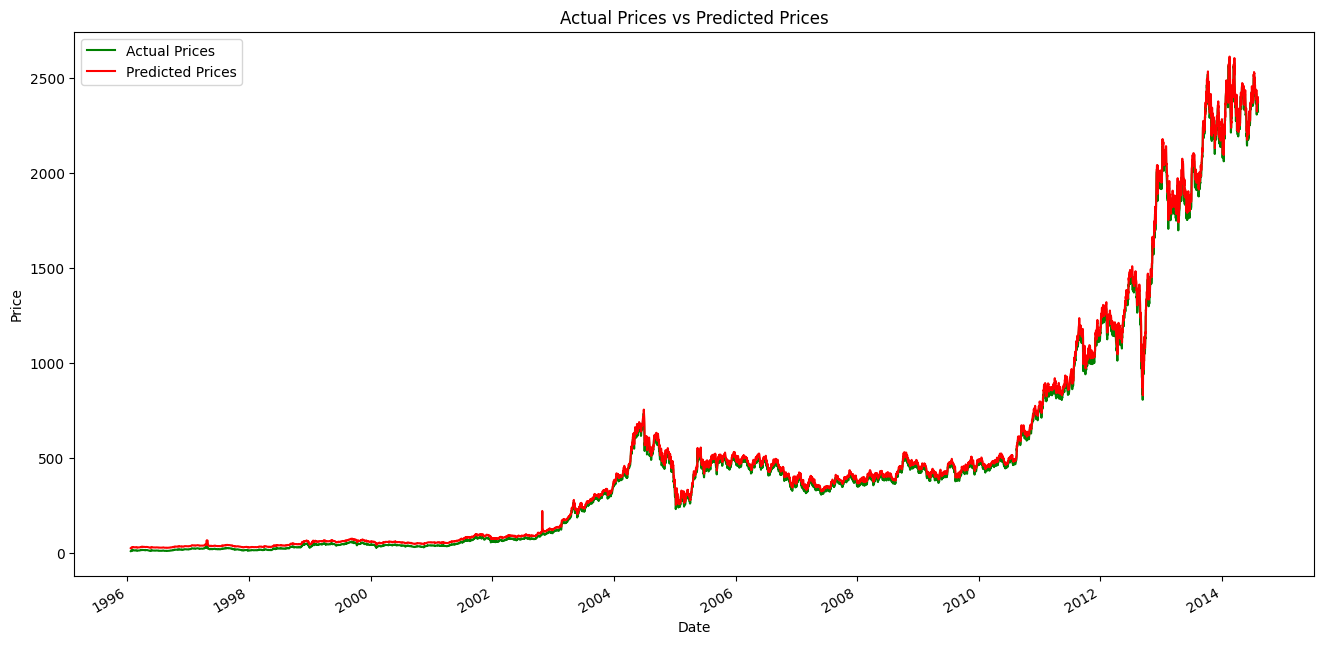

In [57]:
import matplotlib.pyplot as plt

predictions = loaded_model.predict(x_train)
y_train = loaded_scaler.inverse_transform(y_train)
predictions = loaded_scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='1996-01-21', periods=len(x_train), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_train, color='green', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  
plt.show()